## Simple linear regression

In [23]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## create dataset

In [ ]:
path = kagglehub.dataset_download("debajyotipodder/co2-emission-by-vehicles") # download dataset from https://www.kaggle.com/ .

df = pd.read_csv(path + r"\CO2 Emissions_Canada.csv")
df.head()

100%|██████████| 88.3k/88.3k [00:00<00:00, 411kB/s]

Extracting files...


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## 1- Emissions analysis with engine size feature

### a. preprocessing

In [55]:
cdf_1 = df[['Engine Size(L)', 'CO2 Emissions(g/km)']] # We separate the two desired columns from the table.

cdf_1['Engine Size(L)'].describe()

count    7385.000000
mean        3.160068
std         1.354170
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

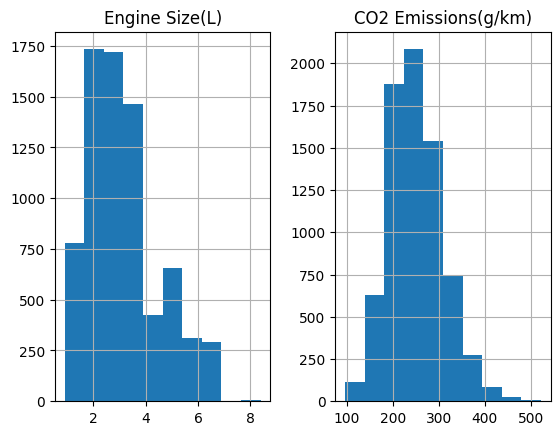

In [58]:
vis_1 = cdf_1[['Engine Size(L)', 'CO2 Emissions(g/km)']]
vis_1.hist()
plt.show()

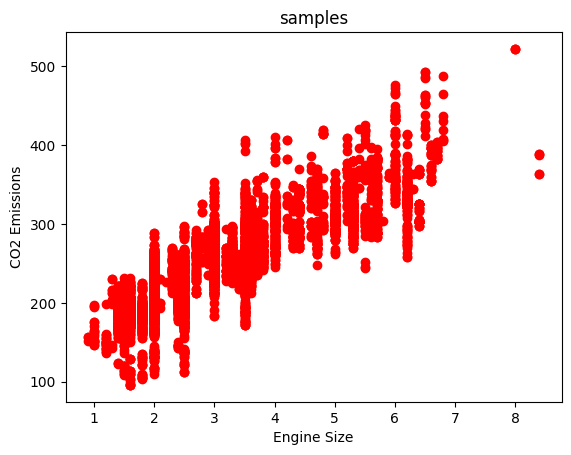

In [59]:
plt.scatter(cdf_1['Engine Size(L)'], cdf_1['CO2 Emissions(g/km)'], c='r')
plt.title('samples')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

In [60]:
msk = np.random.rand(len(df)) < 0.8 # split train and test data.

train_1 = cdf_1[msk]
test_1 = cdf_1[~msk]

train_1.shape, test_1.shape

((5865, 2), (1520, 2))

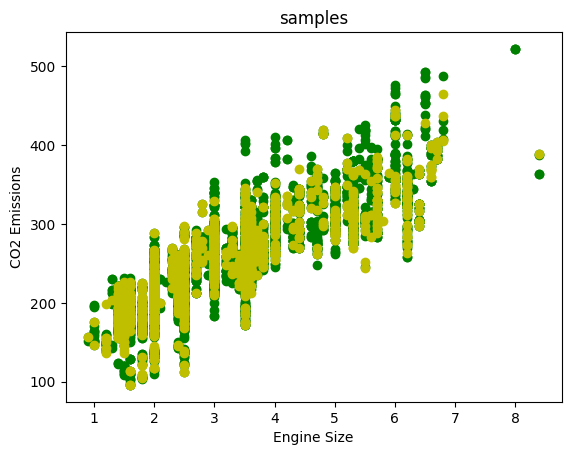

In [61]:
plt.scatter(train_1['Engine Size(L)'], train_1['CO2 Emissions(g/km)'], c='g') # to visualize train and test_1 samples. 
plt.scatter(test_1['Engine Size(L)'], test_1['CO2 Emissions(g/km)'], c='y')
plt.title('samples')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### b. model definition

In [62]:
model_1 = LinearRegression()

x_train_1 = np.asanyarray(train_1[['Engine Size(L)']])
y_train_1 = np.asanyarray(train_1[['CO2 Emissions(g/km)']])

model_1.fit(x_train_1, y_train_1)

print(model_1.coef_, model_1.intercept_)

[[37.06372425]] [133.54722967]


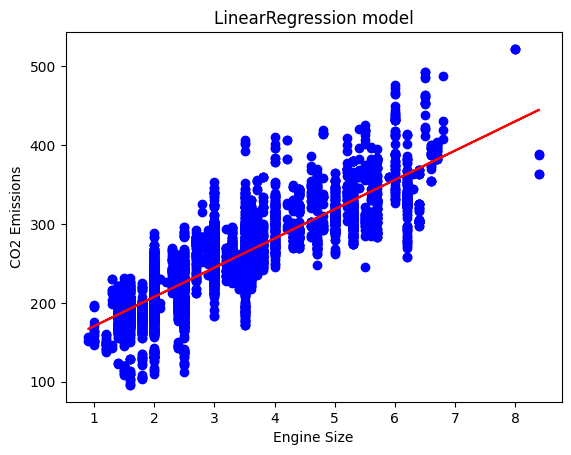

In [63]:
plt.scatter(x_train_1, y_train_1, c='b')
plt.plot(x_train_1, model_1.coef_[0][0] * x_train_1 + model_1.intercept_[0], c='r')
plt.title('LinearRegression model')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### c. evaluating

In [73]:
x_test_1 = np.asanyarray(test_1[['Engine Size(L)']])
y_test_1 = np.asanyarray(test_1[['CO2 Emissions(g/km)']])

y_pred_1 = model_1.predict(x_test_1)

In [76]:
MAE_1 = np.mean(np.absolute(y_test_1 - y_pred_1)) # Mean Absolute Error
MSE_1 = np.mean((y_test_1 - y_pred_1) ** 2) # Mean Squared Error
R2E_1 = r2_score(y_test_1, y_pred_1) # R2 Error

print(f"Mean Absolute Error : {MAE_1} | Mean Squared Error : {MSE_1} | R2 Error : {R2E_1}")

Mean Absolute Error : 22.92188972920003 | Mean Squared Error : 900.0240929143515 | R2 Error : 0.7228091932702467


## 2- Emissions analysis with Cylinders feature

### a. preprocessing

In [66]:
cdf_2 = df[['Cylinders', 'CO2 Emissions(g/km)']]

cdf_2['Cylinders'].describe()

count    7385.000000
mean        5.615030
std         1.828307
min         3.000000
25%         4.000000
50%         6.000000
75%         6.000000
max        16.000000
Name: Cylinders, dtype: float64

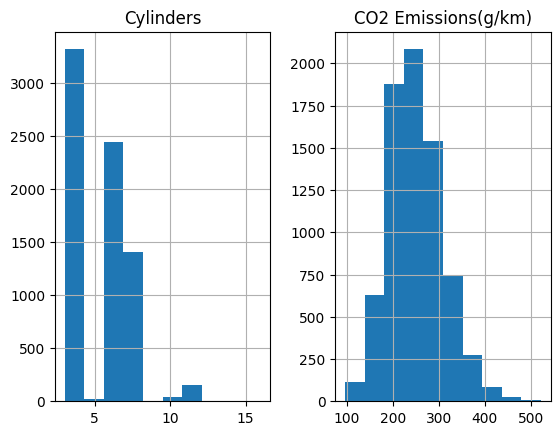

In [67]:
vis_2 = cdf_2[['Cylinders', 'CO2 Emissions(g/km)']]
vis_2.hist()
plt.show()

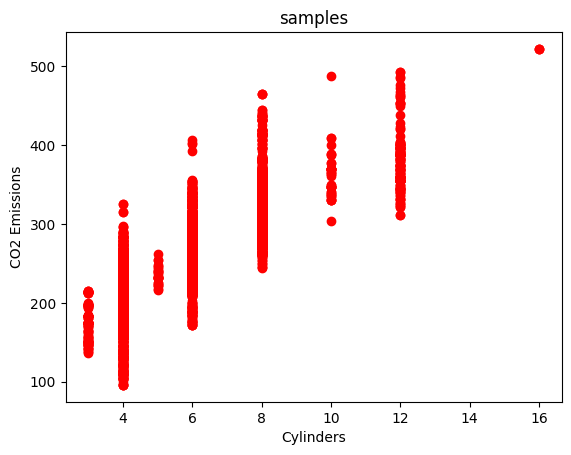

In [68]:
plt.scatter(cdf_2.Cylinders, cdf_2['CO2 Emissions(g/km)'], c='r')
plt.title('samples')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

In [69]:
train_2 = cdf_2[msk] # We use the previous msk boolean array.
test_2 = cdf_2[~msk]

train_2.shape, test_2.shape

((5865, 2), (1520, 2))

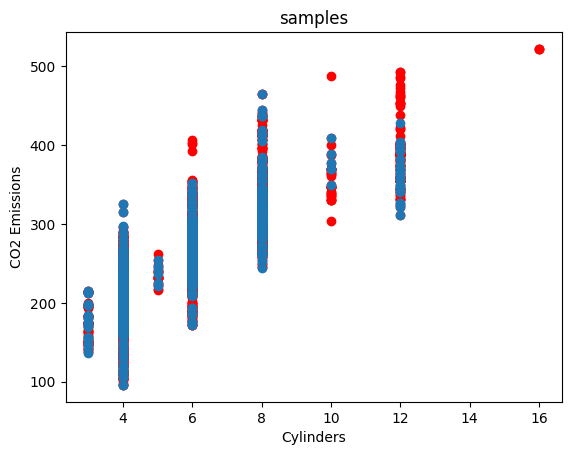

In [70]:
plt.scatter(train_2['Cylinders'], train_2['CO2 Emissions(g/km)'], c='r')
plt.scatter(test_2['Cylinders'], test_2['CO2 Emissions(g/km)'])
plt.title('samples')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

### b. model definition

In [71]:
model_2 = LinearRegression()

x_train_2 = np.asanyarray(train_2[['Cylinders']])
y_train_2 = np.asanyarray(train_2[['CO2 Emissions(g/km)']])

model_2.fit(x_train_2, y_train_2)

print(model_2.coef_, model_2.intercept_)

[[26.8270989]] [100.05758504]


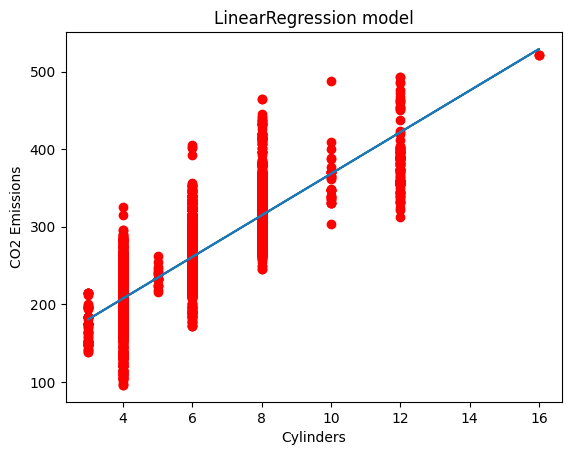

In [72]:
plt.scatter(x_train_2, y_train_2, c='r')
plt.plot(x_train_2, model_2.coef_ * x_train_2 + model_2.intercept_)
plt.title('LinearRegression model')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

### c. evaluating

In [75]:
x_test_2 = np.asanyarray(test_2[['Cylinders']])
y_test_2 = np.asanyarray(test_2[['CO2 Emissions(g/km)']])

y_pred_2 = model_2.predict(x_test_2)

In [77]:
MAE_2 = np.mean(np.absolute(y_test_2 - y_pred_2))
MSE_2 = np.mean((y_test_2 - y_pred_2) ** 2)
R2E_2 = r2_score(y_test_2, y_pred_2)

print(f"Mean Absolute Error : {MAE_2} | Mean Squared Error : {MSE_2} | R2 Error : {R2E_2}")

Mean Absolute Error : 24.41633836193755 | Mean Squared Error : 1064.5887258115822 | R2 Error : 0.672126324099199


## 3- Emissions analysis with Fuel Consumption City feature

### a. preprocessing

In [78]:
cdf_3 = df[['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']]

cdf_3['Fuel Consumption City (L/100 km)'].describe()

count    7385.000000
mean       12.556534
std         3.500274
min         4.200000
25%        10.100000
50%        12.100000
75%        14.600000
max        30.600000
Name: Fuel Consumption City (L/100 km), dtype: float64

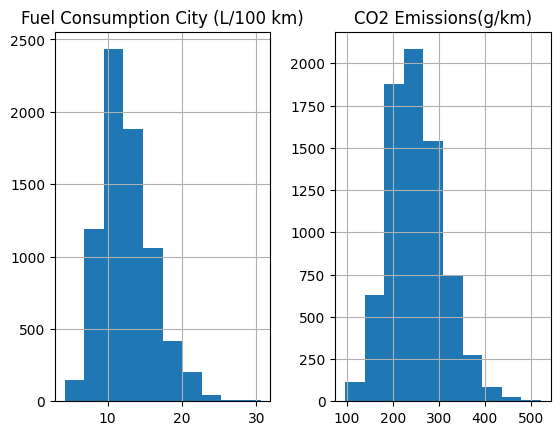

In [80]:
vis_3 = cdf_3[['Fuel Consumption City (L/100 km)', 'CO2 Emissions(g/km)']]
vis_3.hist()
plt.show()

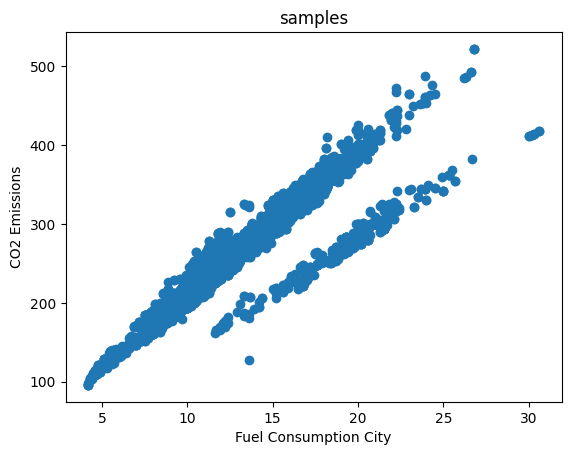

In [81]:
plt.scatter(cdf_3['Fuel Consumption City (L/100 km)'], cdf_3['CO2 Emissions(g/km)'])
plt.title('samples')
plt.xlabel('Fuel Consumption City')
plt.ylabel('CO2 Emissions')
plt.show()

In [82]:
train_3 = cdf_3[msk]
test_3 = cdf_3[~msk]

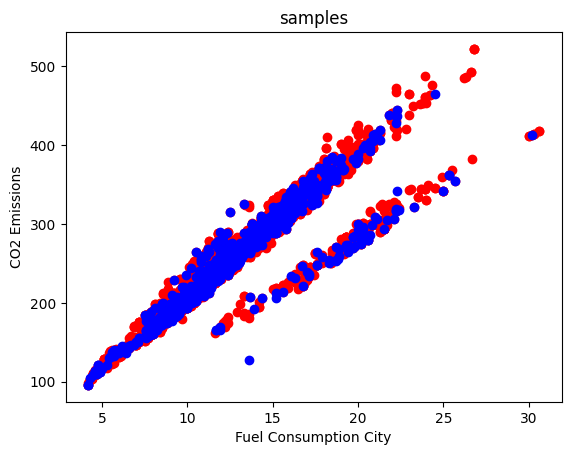

In [83]:
plt.scatter(train_3['Fuel Consumption City (L/100 km)'], train_3['CO2 Emissions(g/km)'], c='r')
plt.scatter(test_3['Fuel Consumption City (L/100 km)'], test_3['CO2 Emissions(g/km)'], c='b')
plt.title('samples')
plt.xlabel('Fuel Consumption City')
plt.ylabel('CO2 Emissions')
plt.show()

### b. model definition

In [84]:
model_3 = LinearRegression()

x_train_3 = np.asanyarray(test_3[['Fuel Consumption City (L/100 km)']])
y_train_3 = np.asanyarray(test_3[['CO2 Emissions(g/km)']])

model_3.fit(x_train_3, y_train_3)

print(model_3.coef_, model_3.intercept_)

[[15.48648389]] [55.85561741]


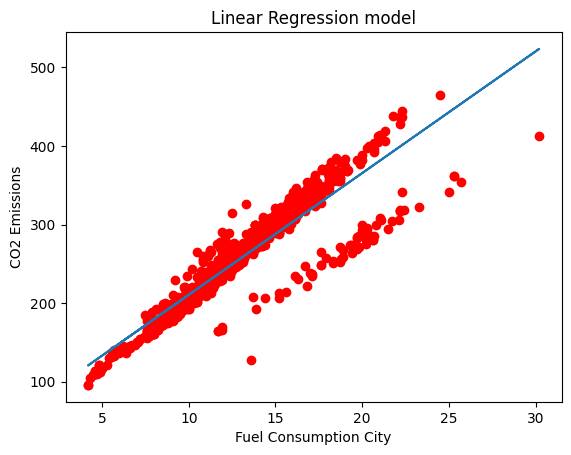

In [89]:
plt.scatter(x_train_3, y_train_3, c='r')
plt.plot(x_train_3, model_3.coef_ * x_train_3 + model_3.intercept_) # y = mx + b
plt.title('Linear Regression model')
plt.xlabel('Fuel Consumption City')
plt.ylabel('CO2 Emissions')
plt.show()

### c. evaluating

In [90]:
x_test_3 = np.asanyarray(test_3[['Fuel Consumption City (L/100 km)']])
y_test_3 = np.asanyarray(test_3[['CO2 Emissions(g/km)']])

y_pred_3 = model_3.predict(x_test_3)

In [91]:
MAE_3 = np.mean(np.absolute(y_test_3 - y_pred_3))
MSE_3 = np.mean((y_test_3 - y_pred_3) ** 2)
R2E_3 = r2_score(y_test_3, y_pred_3)

print(f"Mean Absolute Error : {MAE_3} | Mean Squared Error : {MSE_3} | R2 Error : {R2E_3}")

Mean Absolute Error : 13.756991541416243 | Mean Squared Error : 505.5928516265846 | R2 Error : 0.8442867346302184
